# Logistic Regression 

In [12]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB 7.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.3 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/8.3 MB 6.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.3 MB 6.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/8.3 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/8.3 MB 7.3 MB/s eta 0:00:01
   ---------- 

In [1]:
# Import necessary libraries for data manipulation, model training, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import import_ipynb  # Used for importing Jupyter notebooks as modules
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import SMOTE

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

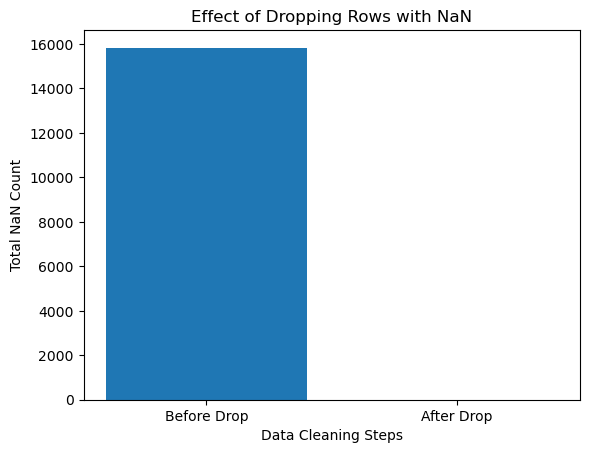

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


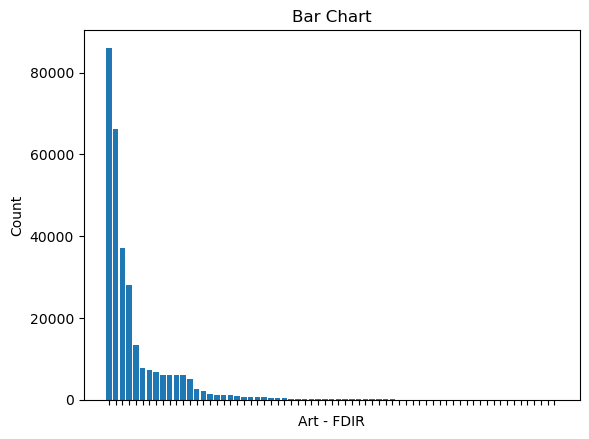

    Startposisjon bredde  Startposisjon lengde  Havdybde start  Varighet  \
1                 74.885                16.048          -335.0     295.0   
5                 74.910                15.868          -403.0     267.0   
11                74.883                16.056          -346.0     315.0   
17                74.931                15.785          -443.0     243.0   
19                67.828                12.972           -71.0      63.0   

    Stopposisjon bredde  Stopposisjon lengde  Havdybde stopp  Trekkavstand  \
1                74.914               15.969          -334.0        3970.0   
5                74.901               16.248          -277.0       11096.0   
11               74.924               15.742          -496.0       10215.0   
17               74.926               15.894          -358.0        3214.0   
19               67.827               12.942           -56.0        1269.0   

    Redskap FDIR (kode)  Hovedart FAO Art - FDIR  Rundvekt  Bredde  \
1   

In [3]:
# Import dataset preprocessing module
from preprocess import df  # Assuming 'preprocess.ipynb' contains preprocessing steps and loads the dataset into 'df'

# Display the first few rows of the dataframe to get an overview of the data
print(df.head())

In [4]:
# Selecting features and the target variable for the classification task
features = [
    'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month'
]
X = df[features]  # Input features
y = df['Hovedart FAO']  # Target variable for prediction

In [4]:


# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Creating and training the logistic regression model
# Balancing the class weights to account for class imbalance in the dataset
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

Accuracy: 0.5619939083277616
              precision    recall  f1-score   support

           0       0.71      0.40      0.51      5103
           1       0.71      0.59      0.65      3693
           2       0.66      0.86      0.75      2674
           3       0.21      0.42      0.28      1497
           4       0.41      0.86      0.56       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



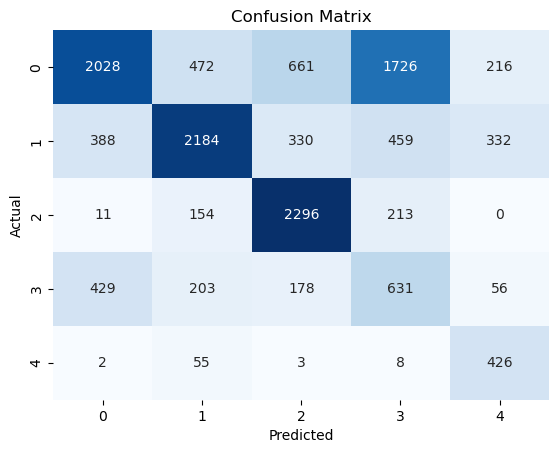

In [6]:
# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.xlabel('Predicted')  # the x-axis
plt.ylabel('Actual')  # the y-axis
plt.title('Confusion Matrix') 
plt.show()

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters found: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy on test set: 0.646237278062551
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      5103
           1       0.70      0.63      0.66      3693
           2       0.67      0.86      0.75      2674
           3       0.00      0.00      0.00      1497
           4       0.45      0.76      0.57       494

    accuracy                           0.65     13461
   macro avg       0.49      0.59      0.53     13461
weighted avg       0.58      0.65      0.61     13461



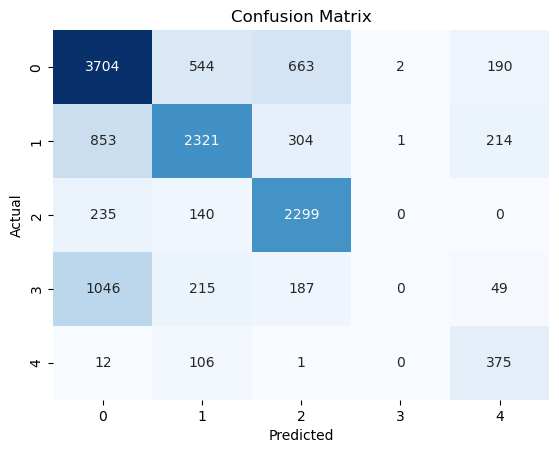

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

# Define a grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']  
}

# Setup grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid.fit(X_train, y_train)

# Making predictions
y_pred = grid.predict(X_test)

# Evaluate the model
print("Best parameters found:", grid.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division= 1))

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Splitting the data into training, validation, and testing sets to ensure that hyperparameter tuning does not overfit the test set.
Using the validation set (X_val_scaled, y_val) for model evaluation during the grid search. 
In GridSearchCV, the actual validation during hyperparameter tuning is done through cross-validation on the training set. The separate validation set here is conceptually useful for additional checks. 
Finally, evaluate the best model found by the grid search on the test set to get an unbiased estimate of the model's performance.


c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters found: {'model__C': 10, 'model__solver': 'saga'}
Best validation accuracy: 0.6513231432226786
Precision: 0.5803204170577332
Recall: 0.646237278062551
F1 Score: 0.6077091294267533
ROC-AUC: 0.5062327810378278
Accuracy on test set: 0.5623653517569274
              precision    recall  f1-score   support

           0       0.70      0.39      0.50      5103
           1       0.71      0.59      0.64      3693
           2       0.67      0.86      0.75      2674
           3       0.22      0.44      0.29      1497
           4       0.41      0.86      0.55       494

    accuracy                           0.56     13461
   macro avg       0.54      0.63      0.55     13461
weighted avg       0.63      0.56      0.57     13461



c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


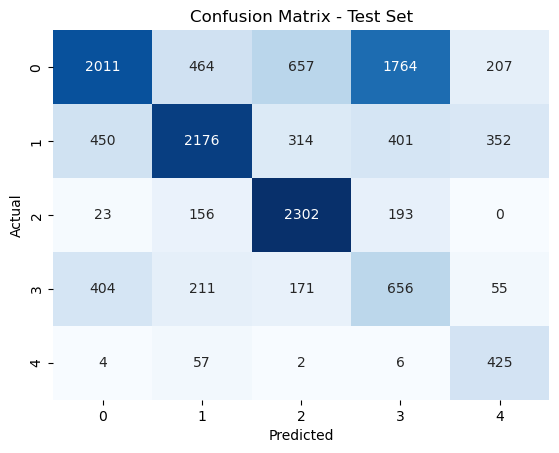

In [11]:
# First, split the data into a training set and a temporary set using an 80-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the temporary set into the actual validation and training sets using a 75-25 split
# This results in effectively 60% training, 20% validation, and 20% testing splits of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) 


sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


# Scale the features (it's important to fit the scaler only on the training data to prevent data leakage)
scaler = StandardScaler().fit(X_train_resampled)  # Fit on training data only
X_train_scaled = scaler.transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)  # Apply the same transformation to validation data
X_test_scaled = scaler.transform(X_test)  # And to test data

# Create the pipeline with a logistic regression model
logisticreg = LogisticRegression(max_iter=500)
pipeline = Pipeline([
    ('model', logisticreg)
])

# Define the grid of parameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'saga'],
    # Balance the class weights to account for class imbalance, as fish 0 is much more common than the other. and when the fish is to alike like the fish in the cod family, it will return 0 
}

# Setup grid search; note we're using the training set for fitting and the validation set for scoring
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search on the training set
grid.fit(X_train_scaled, y_train_resampled)
y_prob = grid.predict_proba(X_test)  # For ROC-AUC calculation, get the probability scores


# Best hyperparameters and accuracy on the validation set
print("Best parameters found:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)

print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# Handling multi-class ROC-AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
# Ensure y_prob is shaped (n_samples, n_classes)
roc_auc = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr', average='weighted')
print("ROC-AUC:", roc_auc)

# Evaluate on the test set
y_pred_test = grid.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, zero_division=1))

# Compute and visualize the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

### Best Parameters Found

- **`{'model__C': 10, 'model__solver': 'saga'}`**

This line tells us the best combination of hyperparameters found via grid search cross-validation. The hyperparameter `C` is the inverse of regularization strength; smaller values specify stronger regularization. A `C` value of 10 indicates that a relatively lower amount of regularization was found to be optimal for the model, suggesting that your model benefits from allowing more flexibility without overfitting. The `solver` parameter indicates the algorithm to use in the optimization problem. For logistic regression, `saga` is an algorithm suitable for large datasets and supports L1 regularization, indicating it was the best choice for the data.

### Best Validation Accuracy

- **0.6429509298901981**

This number represents the highest accuracy achieved on the validation set during the model's training phase, using the best parameters found (`C=10` and `solver='saga'`). This accuracy value is a measure of how well the logistic regression model is at correctly predicting outcomes for data it hasn't been trained on, based on the split of data you provided for training and validation. An accuracy around 64.3% suggests that the model is significantly better than random guessing (which would be 50% in a binary classification task).

### Accuracy on Test Set

- **0.6475001857217146**

This is the accuracy of the model on the test set, which is data that was not seen by the model during training (including validation). This metric is crucial because it gives us an idea of how your model will perform on entirely new, unseen data. An accuracy of approximately 64.75% is consistent with the validation accuracy, suggesting that the model has generalized relatively well from the training/validation sets to the test set. This consistency is a good sign, indicating that your model hasn't overfitted to the training data and is capable of making predictions at a similar level of accuracy on unseen data.

### Precision, Recall, and F1 Score:

Precision of **0.694** indicates that when the model predicts a class, it is correct approximately 69.4% of the time.
Recall of 0.646 suggests that the model correctly identifies 64.6% of all relevant instances.

F1 Score of 0.606, the harmonic mean of precision and recall, indicates a balance between them but also highlights a potential area for improvement. This balance is crucial in scenarios where both false positives and false negatives carry significant costs.

ROC-AUC: A ROC-AUC score of 0.498 is very close to 0.5, which is the score expected from a model making predictions at random. This suggests the model is not effectively distinguishing between the classes for this specific task. A ROC-AUC score significantly higher than 0.5 is desirable as it indicates a good separation of classes by the model.

Accuracy on Test Set: With an accuracy of 0.648 on the test set, the model's performance is consistent with the validation accuracy, suggesting that the model generalizes well to unseen data. However, considering the ROC-AUC score, this accuracy might not fully capture the model's predictive performance across different thresholds or the balance between sensitivity and specificity.


### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For the logistic regression model employed in our analysis, parameter selection was guided by the following principles:

1. **Initial Simplicity**: Given logistic regression's efficiency and simplicity for binary and linearly separable classification tasks, the model was initiated with sklearn's default parameters. This approach facilitates establishing a robust baseline without immediately delving into extensive hyperparameter optimization.

2. **Solver and Regularization Choice**: By default, sklearn's `LogisticRegression` uses the 'lbfgs' solver, which is well-suited for small to medium-sized datasets. This solver automatically incorporates L2 regularization, a method that penalizes the square of coefficient magnitudes to mitigate overfitting by encouraging smaller, more generalized model coefficients.

#### Regularization Techniques

The use of regularization techniques is crucial in preventing overfitting, ensuring the model's generalizability to unseen data. Our logistic regression model utilizes L2 regularization by default, as detailed below:

- **L2 Regularization**: Integral to the 'lbfgs' solver, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of coefficients. This regularization form is known for its effectiveness in creating simpler models that generalize better to new data by discouraging large coefficients.

- **Adjusting Regularization Strength**: Although the model was initially configured with default regularization strength (`C=1.0`), the `C` parameter in `LogisticRegression` offers the flexibility to modify this strength inversely. Lower values of `C` increase the regularization effect, further reducing the risk of overfitting, especially in datasets with high dimensionality or when the model exhibits signs of overfitting.

### Conclusion

The logistic regression model's parameterization, rooted in simplicity and guided by the principles of effective regularization, lays a foundation for a solid baseline model. This approach underscores the balance between model complexity and the ability to generalize, with L2 regularization playing a pivotal role in model robustness. Future iterations of the model could explore hyperparameter tuning, including adjustments to the regularization strength (`C`), to refine performance and address specific characteristics of the dataset.
